## Data Read Step

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Read Statements
df_jun=pd.read_csv(r'C:\Users\sanka\Desktop\austin\listings_jun.csv')
df_mar=pd.read_csv(r'C:\Users\sanka\Desktop\austin\listings_mar.csv')
df_map=pd.read_excel(r'C:\Users\sanka\Desktop\zip_code_database.xlsx')

## Latest Quarter Data Transformation & Feature Engineering

In [47]:
df_jun.drop(['listing_url','scrape_id','name','last_scraped','neighborhood_overview','picture_url','host_url','host_name','host_about','host_thumbnail_url','host_picture_url','host_neighbourhood','host_listings_count','host_total_listings_count','neighbourhood','neighbourhood_group_cleansed','property_type','bathrooms','bedrooms','minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated','has_availability','availability_90','availability_365','calendar_last_scraped','license','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'],axis=1,inplace=True)

df_jun.columns

host_listings=df_jun.host_id.value_counts().reset_index()
host_listings.rename(columns={'index':'Host','host_id':'Count of Listings'},inplace=True)

df_jun['price']=df_jun['price'].apply(lambda x: float(x.split('$')[1].replace(',','')))

m=df_jun['host_verifications'].apply(lambda x: x.split())
k=df_jun['host_verifications'][1]

df_jun['verifications count']=df_jun['host_verifications'].apply(lambda x: len(((((x.replace(' ','')).replace('[','')).replace(']','')).split(','))))
df_jun.loc[df_jun['host_verifications'].isin(['[]','None']), 'verifications count']= 0

df_jun['amenities count']=df_jun['amenities'].apply(lambda x: len(((((x.replace(' ','')).replace('[','')).replace(']','')).split(','))))
df_jun.loc[df_jun['amenities'].isin(['[]','None']), 'amenities count']= 0


df_jun['reviews_per_month'].fillna(0,inplace=True)

df_jun['Listing Age'] = df_jun['number_of_reviews']/df_jun['reviews_per_month']
df_jun['Listing Age'].replace([np.nan],0, inplace=True)

bins=[0,4,7,13,25,61,121,180]
label=['3 month','4 to 6 months','7 months to 1 year','1 to 2 years','2 to 5 years','5 to 10 years','10years and above']
df_jun['Age Bins'] = pd.cut(df_jun['Listing Age'], bins=bins, labels=label, include_lowest=True)

df_jun['Compile Month'] = 'JUN'

## Previous Quarter Data Transformation & Feature Engineering & Merge with latest

In [48]:
df_mar.drop(['listing_url','scrape_id','name','last_scraped','neighborhood_overview','picture_url','host_url','host_name','host_about','host_thumbnail_url','host_picture_url','host_neighbourhood','host_listings_count','host_total_listings_count','neighbourhood','neighbourhood_group_cleansed','property_type','bathrooms','bedrooms','minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated','has_availability','availability_90','availability_365','calendar_last_scraped','license','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'],axis=1,inplace=True)

df_mar.columns

host_listings=df_mar.host_id.value_counts().reset_index()
host_listings.rename(columns={'index':'Host','host_id':'Count of Listings'},inplace=True)

df_mar['price']=df_mar['price'].apply(lambda x: float(x.split('$')[1].replace(',','')))

m=df_mar['host_verifications'].apply(lambda x: x.split())
k=df_mar['host_verifications'][1]

df_mar['verifications count']=df_mar['host_verifications'].apply(lambda x: len(((((x.replace(' ','')).replace('[','')).replace(']','')).split(','))))
df_mar.loc[df_mar['host_verifications'].isin(['[]','None']), 'verifications count']= 0

df_mar['amenities count']=df_mar['amenities'].apply(lambda x: len(((((x.replace(' ','')).replace('[','')).replace(']','')).split(','))))
df_mar.loc[df_mar['amenities'].isin(['[]','None']), 'amenities count']= 0


df_mar['reviews_per_month'].fillna(0,inplace=True)

df_mar['Listing Age'] = df_mar['number_of_reviews']/df_mar['reviews_per_month']
df_mar['Listing Age'].replace([np.nan],0, inplace=True)

bins=[0,4,7,13,25,61,121,180]
label=['3 month','4 to 6 months','7 months to 1 year','1 to 2 years','2 to 5 years','5 to 10 years','10years and above']
df_mar['Age Bins'] = pd.cut(df_mar['Listing Age'], bins=bins, labels=label, include_lowest=True)

df_mar['Compile Month'] = 'MAR'

df_total=df_mar.append(df_jun)

C:\Users\sanka\AppData\Local\Temp\ipykernel_20160\1113816087.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total=df_mar.append(df_jun)


## Calculation of Quarter on Quarter Variation of Listings by Room Type

C:\Users\sanka\AppData\Local\Temp\ipykernel_20160\363605210.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final=final.append(quarter_values)


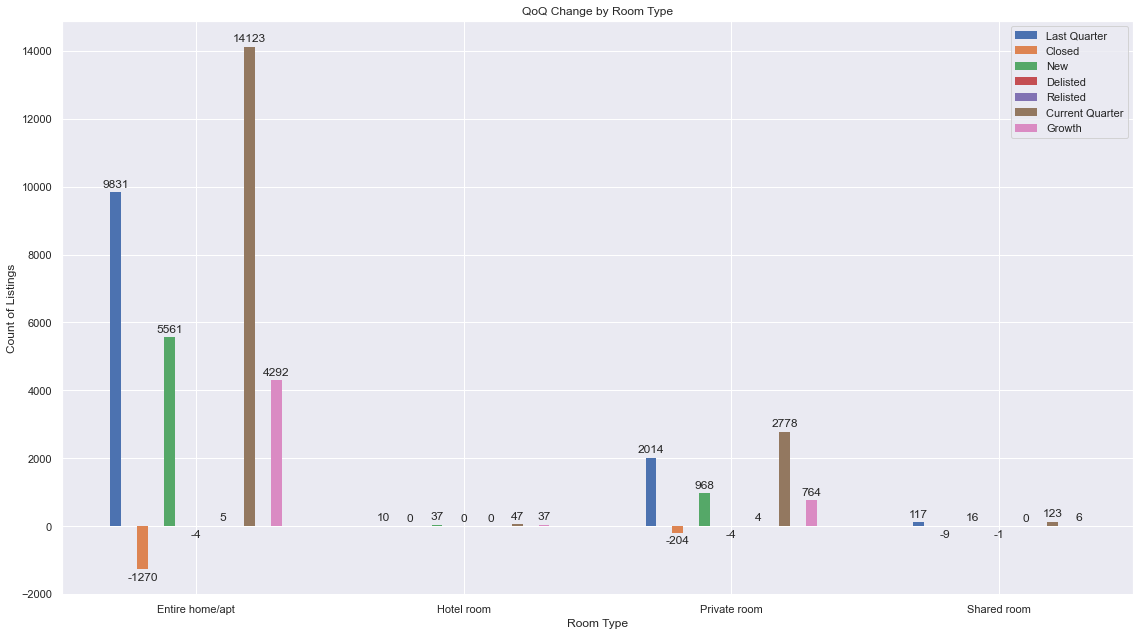

In [49]:

table1=df_total.groupby(['id','Compile Month','room_type'])['accommodates'].sum().reset_index()

table1.sort_values(['id','Compile Month'], inplace=True, ascending=[True,False])

table2=df_total.groupby(['id'])['Compile Month'].count().reset_index().rename(columns={'Compile Month':'Count of Months Active'})

table3=df_total.groupby(['id'])['room_type'].nunique().reset_index().rename(columns={'room_type':'count_of_room_types'})

table1=table1.merge(table2, how='left', on='id')
table1=table1.merge(table3, how='left', on='id')

table1.loc[(table1['Compile Month'] == 'MAR') & (table1['Count of Months Active'] == 1), 'Status'] = 'Closed'
table1.loc[(table1['Compile Month'] == 'JUN') & (table1['Count of Months Active'] == 1), 'Status'] = 'New'
table1.loc[(table1['Compile Month'].isin(['MAR','JUN'])) & (table1['Count of Months Active'] == 2) & (table1['count_of_room_types'] == 1) , 'Status'] = 'Old'
table1.loc[(table1['Compile Month'] == 'MAR') & (table1['Count of Months Active'] == 2) & (table1['count_of_room_types'] == 2) , 'Status'] = 'Delisted'
table1.loc[(table1['Compile Month'] == 'JUN') & (table1['Count of Months Active'] == 2) & (table1['count_of_room_types'] == 2) , 'Status'] = 'Relisted'


final=table1.pivot_table(index=['Status'],columns=['room_type'],aggfunc={'id':pd.Series.count})#.reset_index()

quarter_values=table1.pivot_table(index=['Compile Month'],columns=['room_type'],aggfunc={'id':pd.Series.count})#.reset_index().rename(columns={'Compile Month':'Status'})


final=final.append(quarter_values)
final.fillna(0,inplace=True)

closed=list(final.loc['Closed'])
closed = [x*(-1) for x in closed]
prev_quarter=list(final.loc['MAR'])
curr_quarter=list(final.loc['JUN'])
new=list(final.loc['New'])
relisted=list(final.loc['Relisted'])
delisted=list(final.loc['Delisted'])
delisted = [x*(-1) for x in delisted]
growth = [element1 - element2 for (element1, element2) in zip(curr_quarter, prev_quarter)]


cols=final['id']
labels=list(cols.columns)

x = np.arange(start=50,stop=210,step=50)
width = 2

fig, ax = plt.subplots(figsize =(16, 9))
bar1 = ax.bar(x - 15, prev_quarter, width, label='Last Quarter',linewidth=0)
bar2 = ax.bar(x - 10, closed, width, label='Closed',linewidth=0)
bar3 = ax.bar(x - 5, new, width, label='New',linewidth=0)
bar4 = ax.bar(x, delisted, width, label='Delisted',linewidth=0)
bar5 = ax.bar(x + 5, relisted, width, label='Relisted',linewidth=0)
bar6 = ax.bar(x + 10, curr_quarter, width, label='Current Quarter',linewidth=0)
bar7 = ax.bar(x + 15, growth, width, label='Growth',linewidth=0)

ax.set_ylabel('Count of Listings')
ax.set_xlabel('Room Type')
ax.set_title('QoQ Change by Room Type')
ax.set_xticks(x, labels)
ax.legend()



ax.bar_label(bar1, padding=3)
ax.bar_label(bar2, padding=3)
ax.bar_label(bar3, padding=3)
ax.bar_label(bar4, padding=3)
ax.bar_label(bar5, padding=3)
ax.bar_label(bar6, padding=3)
ax.bar_label(bar7, padding=3)

fig.tight_layout()

plt.show()

In [50]:
# Adding QoQ Listing data to base table

join_table=table1[['id','Status']]
df_total=df_total.merge(join_table,on='id',how='left')
df_total.rename(columns={'Status':'QoQ Listing Status'},inplace=True)

## Calculating QoQ variation of Hosts to/fro from Superhost status

In [51]:
df_total.loc[df_total['host_is_superhost'] != 't','host_is_superhost']= 0
df_total.loc[df_total['host_is_superhost'] == 't','host_is_superhost']= 1

check=df_total.pivot_table(index='host_id',columns=['Compile Month'],aggfunc={'host_is_superhost':pd.Series.sum}).reset_index()
check.fillna(0,inplace=True)
table4=pd.DataFrame(columns=['host_id','MAR','JUN'])

val1=list(check[('host_id','')])
val2=list(check[('host_is_superhost','MAR')])
val3=list(check[('host_is_superhost','JUN')])
table4['host_id']=val1
table4['MAR']=val2
table4['JUN']=val3


table4.loc[(table4['MAR'] == 0) & (table4['JUN'] == 0),'Superhost Status'] = 'Remained Non-Superhost'
table4.loc[(table4['MAR'] != 0) & (table4['JUN'] == 0),'Superhost Status'] = 'Downgraded from Superhost'
table4.loc[(table4['MAR'] == 0) & (table4['JUN'] != 0),'Superhost Status'] = 'Upgraded to Superhost'
table4.loc[(table4['MAR'] != 0) & (table4['JUN'] != 0),'Superhost Status'] = 'Remained Superhost'

sup_host_stat=table4[['host_id','Superhost Status']]
df_total=df_total.merge(sup_host_stat,on='host_id',how='left')

df_total.loc[df_total['host_is_superhost'] == 0,'host_is_superhost']='Not Superhost'
df_total.loc[df_total['host_is_superhost'] == 1,'host_is_superhost']='Superhost'

## Mapping Neighborhood to Listing ZIP code in data

In [52]:
df_map=df_map[['zip','county']]
df_total=df_total.merge(df_map,right_on='zip',left_on='neighbourhood_cleansed',how='left')
df_total.drop(['zip'],axis=1,inplace=True)

## Heat Map for Average age of Listing by Room_Type and Location

In [53]:
df_total_jun=df_total.loc[df_total['Compile Month'] == 'JUN']
test=df_total_jun.pivot_table(index=['county'],columns=['room_type'],aggfunc={'Listing Age':pd.Series.mean})
test.fillna(0,inplace=True)
test=test['Listing Age']
test

room_type,Entire home/apt,Hotel room,Private room,Shared room
county,,,,
Bastrop County,22.807451,0.000000,37.905372,35.643449
Blanco County,26.542209,0.000000,29.884117,0.000000
Burnet County,19.691615,31.990267,25.082865,0.000000
Caldwell County,13.655877,0.000000,41.119003,0.000000
Hays County,27.430536,29.868189,27.628397,0.000000
Travis County,28.873940,17.500000,31.021148,36.144685
Williamson County,17.104690,24.897959,24.821695,19.528513


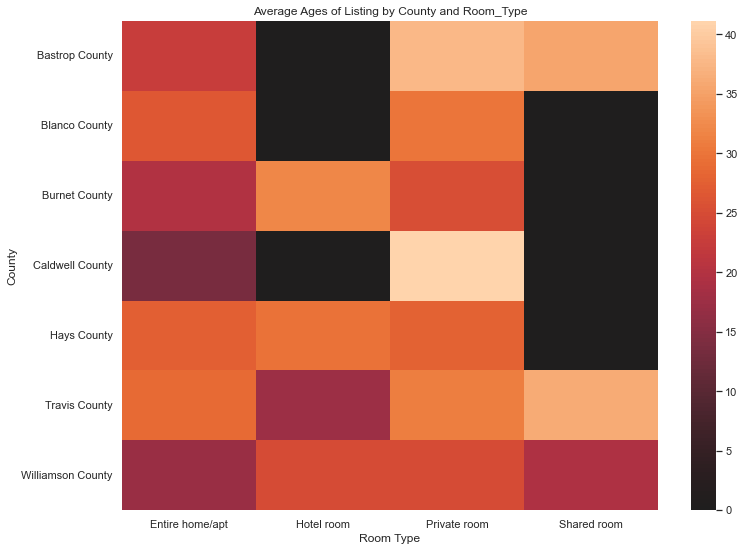

In [54]:
import seaborn as sns
cmap = "tab20"
center = 0
sns.set()
ax = sns.heatmap(test,center=center)
plt.title("Average Ages of Listing by County and Room_Type")
plt.xlabel("Room Type")
plt.ylabel("County")
plt.show()

## Calculating the % of Hosts in each location that have upgraded to/ downgraded from Superhost status

In [55]:
df_table3=df_total.loc[df_total['Compile Month'] == 'JUN']
df_table3=df_table3.pivot_table(index=['Superhost Status'],columns=['county'],aggfunc={'host_id':pd.Series.nunique})
df_table3.fillna(0,inplace=True)
df_table3=df_table3['host_id']
cnt=len(df_table3.columns)

for i in range(0,cnt):
    df_table3.iloc[:,i]=(df_table3.iloc[:,i]/sum(df_table3.iloc[:,i]))*100
df_table3

county,Bastrop County,Blanco County,Burnet County,Caldwell County,Hays County,Travis County,Williamson County
Superhost Status,,,,,,,
Downgraded from Superhost,0.000000,0.000000,0.330033,2.857143,2.612482,7.196921,2.038043
Remained Non-Superhost,47.945205,32.911392,54.125413,48.571429,44.557329,64.874920,56.657609
Remained Superhost,5.479452,3.797468,5.280528,1.428571,9.724238,20.282232,6.250000
Upgraded to Superhost,46.575342,63.291139,40.264026,47.142857,43.105951,7.645927,35.054348


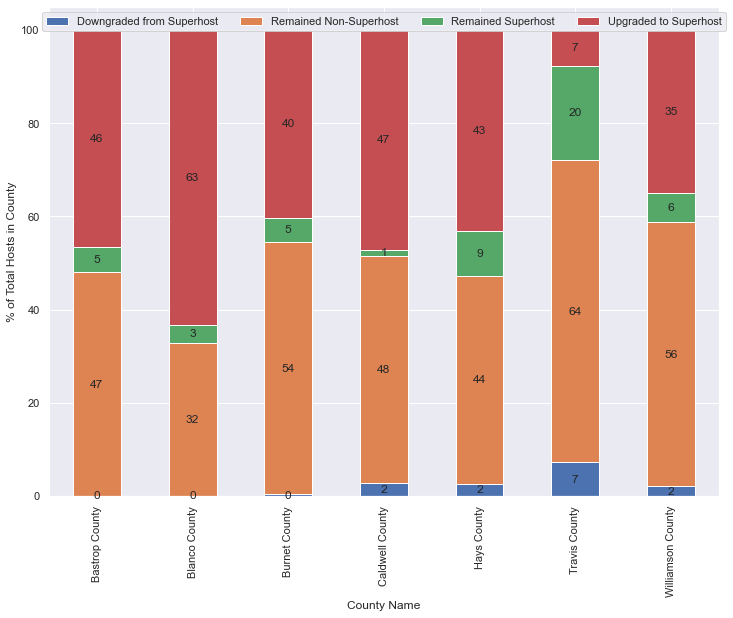

In [56]:
df_table3_trans=df_table3.transpose()
ax = df_table3_trans.plot(stacked=True, kind='bar')
plt.rcParams["figure.figsize"] = 15,10

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = int(height)
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')

plt.xlabel("County Name")
plt.ylabel("% of Total Hosts in County")
plt.legend(loc='upper center', ncol=4)    
plt.show()

## Calculating the Change of Average Review Rating by presence of host profile pic & verification

In [57]:
df_pic_id=df_total.copy()
df_pic_id.loc[df_pic_id['host_has_profile_pic'] != 't','host_has_profile_pic']='Profile picture absent'
df_pic_id.loc[df_pic_id['host_has_profile_pic'] == 't','host_has_profile_pic']='Profile picture present'

df_pic_id.loc[df_pic_id['host_identity_verified'] != 't','host_identity_verified']='Not Verified'
df_pic_id.loc[df_pic_id['host_identity_verified'] == 't','host_identity_verified']='Verified'

df2=df_pic_id.groupby(['host_has_profile_pic','host_identity_verified'])['review_scores_rating'].mean()

df2=df2.reset_index(drop=False)
df2_1=df2.loc[[0,2]]
df2_2=df2.loc[[1,3]]
df2

,host_has_profile_pic,host_identity_verified,review_scores_rating
0,Profile picture absent,Not Verified,4.259339
1,Profile picture absent,Verified,4.437239
2,Profile picture present,Not Verified,4.762814
3,Profile picture present,Verified,4.777150


Text(0.5, 0, 'Host Profile Picture Status')

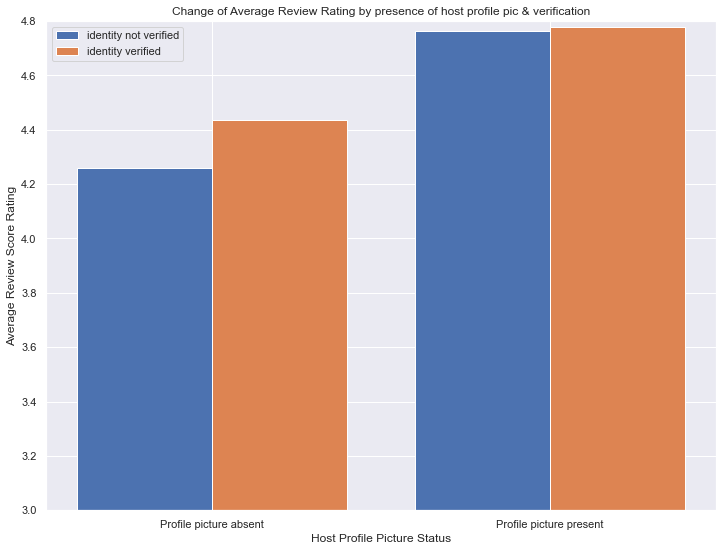

In [58]:
labels=list(df2['host_has_profile_pic'].unique())
x=np.arange(0,len(labels),1)
plt.rcParams["figure.figsize"] = (12,9)
plt.bar(x-0.2,df2_1['review_scores_rating'],width=0.4,label='identity not verified')
plt.bar(x+0.2,df2_2['review_scores_rating'],width=0.4,label='identity verified')

plt.legend()
plt.ylim([3,4.8])
plt.xticks(x,labels)
plt.title("Change of Average Review Rating by presence of host profile pic & verification")
plt.ylabel("Average Review Score Rating")
plt.xlabel("Host Profile Picture Status")

## Comparing Average Review Rating & Average Listing Price across Room Types

In [59]:
df3=df_total.groupby('room_type')['review_scores_rating','price'].mean()
df4=df3.reset_index(drop=False)
df4.head()

C:\Users\sanka\AppData\Local\Temp\ipykernel_20160\2610327571.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3=df_total.groupby('room_type')['review_scores_rating','price'].mean()


,room_type,review_scores_rating,price
0,Entire home/apt,4.779280,360.699686
1,Hotel room,4.759804,442.363636
2,Private room,4.745232,131.751070
3,Shared room,4.601513,68.123077


Text(0.5, 1.0, 'Average Listing Price and Average Review Score Rating by Room Type')

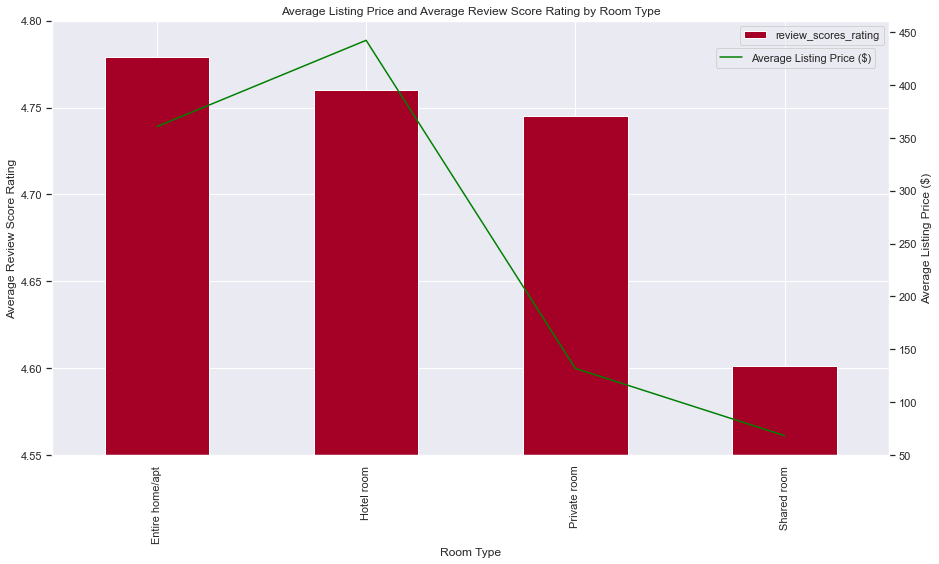

In [60]:
fig, ax = plt.subplots(figsize = (15,8))
ax2=ax.twinx()

df4.plot(x = 'room_type', y= ['review_scores_rating'], kind = 'bar',ax=ax, colormap="RdYlBu")
ax2.grid(False)
ax2.plot(ax.get_xticks(),df4['price'], color='green')

ax.set_ylim([4.55, 4.8])
ax.set_ylabel('Average Review Score Rating')
ax2.set_ylabel("Average Listing Price ($)")
ax.set_xlabel('Room Type')
ax2.legend(['Average Listing Price ($)'],bbox_to_anchor=(0.99,0.95),loc='best')
ax.set_title('Average Listing Price and Average Review Score Rating by Room Type')

## Pie Chart: Percentage Breakup of Superhosts and Non-Superhosts by Host Response Time

In [61]:
df_table4=df_total.loc[(df_total['Compile Month'] == 'JUN')]
df_table4['host_response_time'].fillna('',inplace=True)
df_table4=df_table4.loc[(df_table4['host_response_time'] != '')]
df_table4=df_table4.pivot_table(index=['host_is_superhost'],columns=['host_response_time'],aggfunc={'host_id':pd.Series.nunique})
df_table4.fillna(0,inplace=True)
df_table4=df_table4['host_id']
df_table4_trans=df_table4.transpose()
df_table4_trans
cnt=len(df_table4_trans.columns)

for i in range(0,cnt):
    df_table4_trans.iloc[:,i]=(df_table4_trans.iloc[:,i]/sum(df_table4_trans.iloc[:,i]))*100

C:\Users\sanka\AppData\Local\Temp\ipykernel_20160\796463071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table4['host_response_time'].fillna('',inplace=True)


In [62]:
df_table4_trans.head()

host_is_superhost,Not Superhost,Superhost
host_response_time,,
a few days or more,3.033740,0.101729
within a day,11.851432,3.763988
within a few hours,14.743408,10.885046
within an hour,70.371420,85.249237


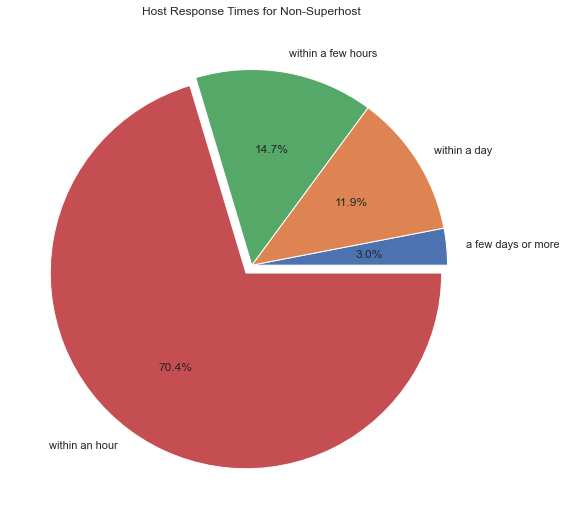

In [63]:
explode = (0,0,0,0.05)
plt.pie(df_table4_trans['Not Superhost'], labels = df_table4_trans.index, autopct='%1.1f%%',explode=explode)
plt.title("Host Response Times for Non-Superhost")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

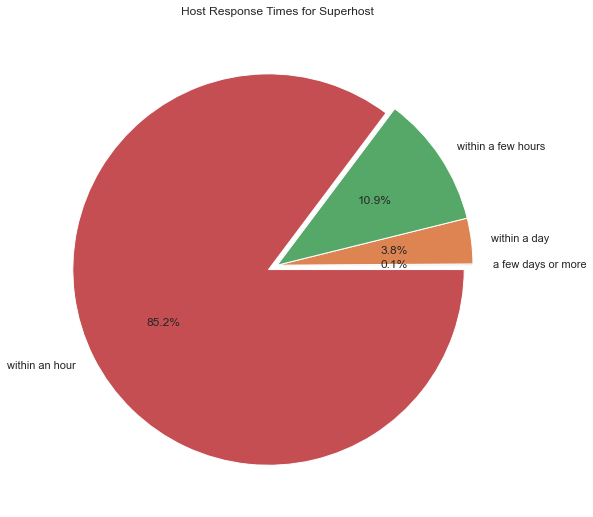

In [64]:
explode = (0,0,0,0.05)
plt.pie(df_table4_trans['Superhost'], labels = df_table4_trans.index, autopct='%1.1f%%',explode=explode)
plt.title("Host Response Times for Superhost")
plt.show

## Calculation of Quarter on Quarter Variation of Listings by County

C:\Users\sanka\AppData\Local\Temp\ipykernel_20160\2373961329.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_county=df_county.append(quarter_values)


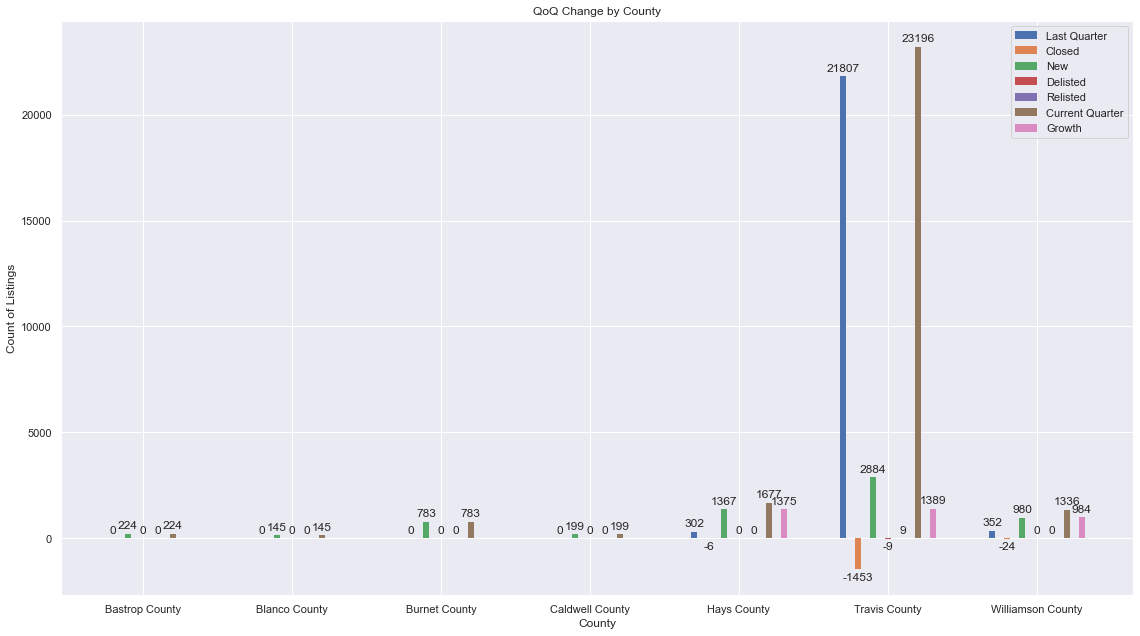

In [65]:
df_county=df_total.pivot_table(index=df_total['QoQ Listing Status'],columns=['county'],aggfunc={'id':pd.Series.nunique})
df_county.fillna(0,inplace=True)
quarter_values=df_total.pivot_table(index=['Compile Month'],columns=['county'],aggfunc={'id':pd.Series.count})
df_county=df_county.append(quarter_values)

closed=list(df_county.loc['Closed'])
closed = [x*(-1) for x in closed]
prev_quarter=list(df_county.loc['MAR'])
curr_quarter=list(df_county.loc['JUN'])
new=list(df_county.loc['New'])
relisted=list(df_county.loc['Relisted'])
delisted=list(df_county.loc['Delisted'])
delisted = [x*(-1) for x in delisted]
growth = [element1 - element2 for (element1, element2) in zip(curr_quarter, prev_quarter)]

cols=df_county['id']
labels=list(cols.columns)
x = np.arange(start=50,stop=370,step=50)
width = 2 


fig, ax = plt.subplots(figsize =(16, 9))
bar1 = ax.bar(x - 15, prev_quarter, width, label='Last Quarter',linewidth=0)
bar2 = ax.bar(x - 10, closed, width, label='Closed',linewidth=0)
bar3 = ax.bar(x - 5, new, width, label='New',linewidth=0)
bar4 = ax.bar(x, delisted, width, label='Delisted',linewidth=0)
bar5 = ax.bar(x + 5, relisted, width, label='Relisted',linewidth=0)
bar6 = ax.bar(x + 10, curr_quarter, width, label='Current Quarter',linewidth=0)
bar7 = ax.bar(x + 15, growth, width, label='Growth',linewidth=0)

ax.set_ylabel('Count of Listings')
ax.set_xlabel('County')
ax.set_title('QoQ Change by County')
ax.set_xticks(x, labels)
ax.legend()



ax.bar_label(bar1, padding=3)
ax.bar_label(bar2, padding=3)
ax.bar_label(bar3, padding=3)
ax.bar_label(bar4, padding=3)
ax.bar_label(bar5, padding=3)
ax.bar_label(bar6, padding=3)
ax.bar_label(bar7, padding=3)

fig.tight_layout()

plt.show()

## Superhost vs. Non-superhost: Average count of Amenities by Room Type

Text(0.5, 1.0, 'Superhost vs. Non-superhost Average # of Amenities by Room Type')

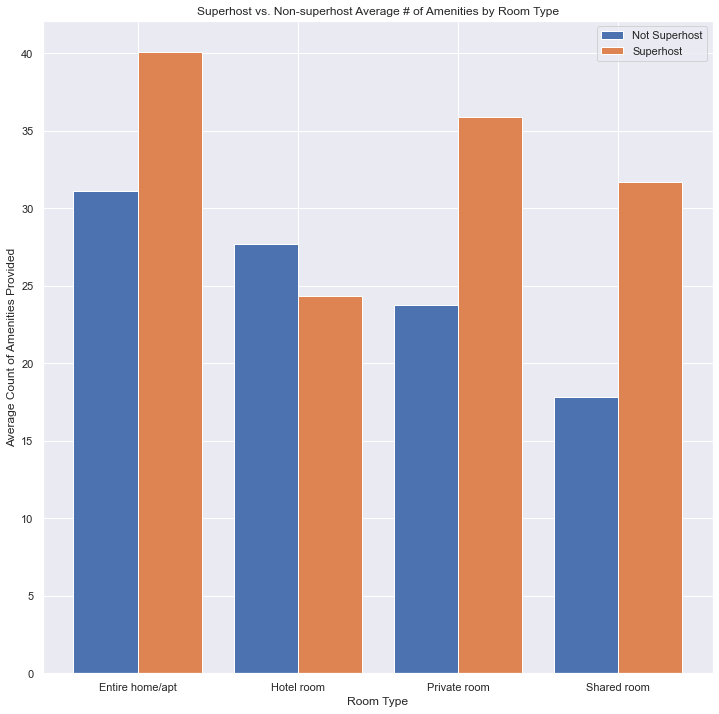

In [66]:
df_av_jun=df_total.loc[df_total['Compile Month'] == 'JUN']
df_new = df_av_jun.groupby(['room_type','host_is_superhost'])['amenities count'].mean()
df_new = df_new.reset_index(drop = False)
df_1 = df_new.loc[[0,2,4,6]]
df_2 = df_new.loc[[1,3,5,7]]


labels=list(df_new['room_type'].unique())
x=np.arange(0,len(labels),1)
plt.rcParams["figure.figsize"] = (12,12)
plt.bar(x-0.2,df_1['amenities count'],width=0.4,label='Not Superhost')
plt.bar(x+0.2,df_2['amenities count'],width=0.4,label='Superhost')


plt.legend()
plt.xticks(x,labels)
plt.ylabel("Average Count of Amenities Provided")
plt.xlabel("Room Type")
plt.title("Superhost vs. Non-superhost Average # of Amenities by Room Type")

## Superhost vs. Non-superhost: Average count of Host Verifications by Room Type

Text(0.5, 1.0, 'Superhost vs. Non-superhost Average # of Host Verifications by Room Type')

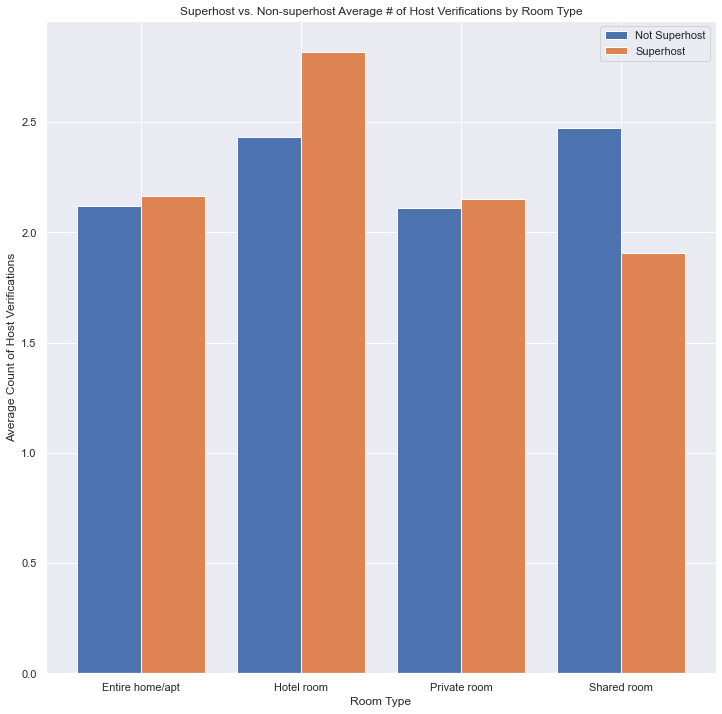

In [67]:
df_av_jun=df_total.loc[df_total['Compile Month'] == 'JUN']
df_new = df_av_jun.groupby(['room_type','host_is_superhost'])['verifications count'].mean()
df_new = df_new.reset_index(drop = False)
df_1 = df_new.loc[[0,2,4,6]]
df_2 = df_new.loc[[1,3,5,7]]


labels=list(df_new['room_type'].unique())
x=np.arange(0,len(labels),1)
plt.rcParams["figure.figsize"] = (12,12)
plt.bar(x-0.2,df_1['verifications count'],width=0.4,label='Not Superhost')
plt.bar(x+0.2,df_2['verifications count'],width=0.4,label='Superhost')


plt.legend()
plt.xticks(x,labels)
plt.ylabel("Average Count of Host Verifications")
plt.xlabel("Room Type")
plt.title("Superhost vs. Non-superhost Average # of Host Verifications by Room Type")